# Heart Disease Prediction

Dataset: [Heart Disease UCI](https://www.kaggle.com/ronitf/heart-disease-uci)

In [47]:
# importing dependencies
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
import itertools
import matplotlib.pyplot as plt


## Pre-processing data

Read .csv file into Pandas dataframe

In [2]:
heart_disease_df= pd.read_csv('/content/data.csv')

In [5]:
heart_disease_df.shape

(303, 14)

In [3]:
heart_disease_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


Check for missing values

In [7]:
heart_disease_df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
heart_disease_df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


1:  Heart disease \
0:  No heart disease


In [13]:
heart_disease_df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

Splitting Features and Target 

In [21]:
x = heart_disease_df.loc[:, heart_disease_df.columns!='target']
y= heart_disease_df['target']

In [22]:
print(x)

     age  sex  cp  trestbps  chol  ...  exang  oldpeak  slope  ca  thal
0     63    1   3       145   233  ...      0      2.3      0   0     1
1     37    1   2       130   250  ...      0      3.5      0   0     2
2     41    0   1       130   204  ...      0      1.4      2   0     2
3     56    1   1       120   236  ...      0      0.8      2   0     2
4     57    0   0       120   354  ...      1      0.6      2   0     2
..   ...  ...  ..       ...   ...  ...    ...      ...    ...  ..   ...
298   57    0   0       140   241  ...      1      0.2      1   0     3
299   45    1   3       110   264  ...      0      1.2      1   0     3
300   68    1   0       144   193  ...      0      3.4      1   2     3
301   57    1   0       130   131  ...      1      1.2      1   1     3
302   57    0   1       130   236  ...      0      0.0      1   1     2

[303 rows x 13 columns]


In [23]:
print(y)

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64


Train-Test Split

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, stratify=y, random_state=4)

In [27]:
print(x.shape, x_train.shape, x_test.shape)

(303, 13) (212, 13) (91, 13)


## Confusion Matrix

In [50]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


## Training

### Logistic Regression

In [51]:
model_lg = LogisticRegression()
model_lg.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

Performance Evaluation: Accuracy 

In [124]:
y_test_predictions_lg=model_lg.predict(x_test)
lg_testing_acc= round(accuracy_score(y_test_predictions_lg, y_test)*100)

In [125]:
print("Accuracy using logistic regression is: "+str(lg_testing_acc)+" %")

Accuracy using logistic regression is: 87 %


Confusion Matrix

In [126]:
cm = confusion_matrix(y_true=y_test,y_pred=y_test_predictions_lg)

Confusion matrix, without normalization
[[31 10]
 [ 2 48]]


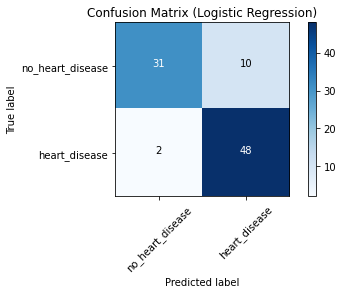

In [127]:
cm_plot_labels =['no_heart_disease','heart_disease']
plot_confusion_matrix(cm=cm,classes=cm_plot_labels,title='Confusion Matrix (Logistic Regression)')

## Neural Network

In [132]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy, BinaryAccuracy
from keras import regularizers

In [118]:
model_nn = Sequential()
model_nn.add(Dense(16, input_dim=13, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001),activation='relu'))
model_nn.add(Dropout(0.25))
model_nn.add(Dense(8, kernel_initializer='normal',  kernel_regularizer=regularizers.l2(0.001),activation='relu'))
model_nn.add(Dropout(0.25))
model_nn.add(Dense(1, activation='sigmoid'))


In [119]:
model_nn.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_23 (Dense)            (None, 16)                224       
                                                                 
 dropout_2 (Dropout)         (None, 16)                0         
                                                                 
 dense_24 (Dense)            (None, 8)                 136       
                                                                 
 dropout_3 (Dropout)         (None, 8)                 0         
                                                                 
 dense_25 (Dense)            (None, 1)                 9         
                                                                 
Total params: 369
Trainable params: 369
Non-trainable params: 0
_________________________________________________________________


In [120]:
model_nn.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [123]:
model_nn.fit(x_train, y_train, epochs=300, batch_size=10)


Epoch 1/300
22/22 [==============================] - 0s 3ms/step - loss: 0.4385 - accuracy: 0.8019
Epoch 2/300
22/22 [==============================] - 0s 2ms/step - loss: 0.4746 - accuracy: 0.8066
Epoch 3/300
22/22 [==============================] - 0s 2ms/step - loss: 0.4402 - accuracy: 0.8160
Epoch 4/300
22/22 [==============================] - 0s 2ms/step - loss: 0.4774 - accuracy: 0.7406
Epoch 5/300
22/22 [==============================] - 0s 2ms/step - loss: 0.4529 - accuracy: 0.8019
Epoch 6/300
22/22 [==============================] - 0s 2ms/step - loss: 0.4698 - accuracy: 0.7972
Epoch 7/300
22/22 [==============================] - 0s 2ms/step - loss: 0.4619 - accuracy: 0.7972
Epoch 8/300
22/22 [==============================] - 0s 2ms/step - loss: 0.4635 - accuracy: 0.8113
Epoch 9/300
22/22 [==============================] - 0s 3ms/step - loss: 0.4506 - accuracy: 0.8255
Epoch 10/300
22/22 [==============================] - 0s 3ms/step - loss: 0.4413 - accuracy: 0.7972
Epoch 11/

In [129]:
y_test_predictions_nn= model_nn.predict(x_test)

In [137]:
metric = BinaryAccuracy(threshold = 0.5)
metric.update_state(y_test,y_test_predictions_nn)
nn_testing_acc= round(metric.result().numpy()*100)

In [136]:
print("Accuracy using neural network is: "+str(nn_testing_acc)+" %")

Accuracy using neural network is: 86 %


### Decision Tree

In [147]:
from sklearn.tree import DecisionTreeClassifier